# Draw distance-meshes between neighbors
When studying neighborhood-relationships between cells, e.g. to determine if cells can communicate with each other, their distances to each other are relevant. We can visualize those using distance meshes.

In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imread

We're using a dataset published by [Heriche et al.](https://doi.org/10.1091/mbc.E13-04-0221) licensed [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) available in the [Image Data Resource](https://idr.openmicroscopy.org/webclient/img_detail/179719/).

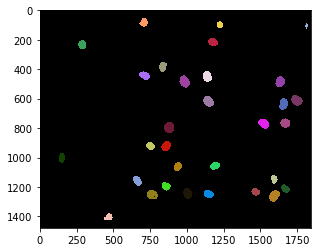

In [2]:
raw_image = imread("../../data/plate1_1_013 [Well 5, Field 1 (Spot 5)].png")[:,:,0]

nuclei = cle.voronoi_otsu_labeling(raw_image, spot_sigma=15)

cle.imshow(nuclei, labels=True)

A mesh can for example be drawn between proximal neighbors, nuclei which are closer than a given maximum distance.

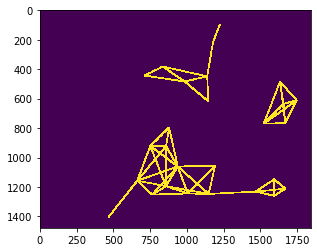

In [3]:
max_distance = 320

proximal_neighbor_mesh = cle.draw_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# we make the lines a bit thicker for visualization purposes
proximal_neighbor_mesh = cle.maximum_box(proximal_neighbor_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_neighbor_mesh)

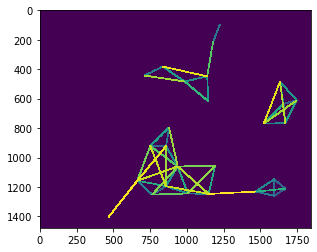

In [4]:
proximal_distance_mesh = cle.draw_distance_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# we make the lines a bit thicker for visualization purposes
proximal_distance_mesh = cle.maximum_box(proximal_distance_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_distance_mesh)

## Distance meshes in more detail
For drawing a distance mesh, we need to combine a distance matrix, an abstract representation of distances of all objects to each other with a neighborhood-matrix, which represents which cells are neighbors.

We start with the distance matrix.

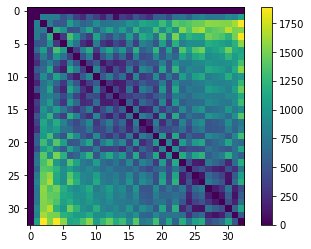

In [5]:
centroids = cle.centroids_of_background_and_labels(nuclei)

distance_matrix = cle.generate_distance_matrix(centroids, centroids)

# we ignor distances to the background object
cle.set_column(distance_matrix, 0, 0)
cle.set_row(distance_matrix, 0, 0)

cle.imshow(distance_matrix, colorbar=True)

Next, we should setup a matrix which represents for each nucleus (from the left to the right) which are its n nearest neighbors.

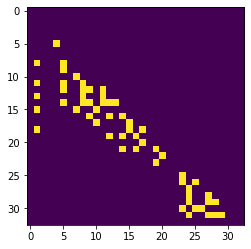

In [6]:
proximal_neighbor_matrix = cle.generate_proximal_neighbors_matrix(distance_matrix, max_distance=max_distance)

cle.imshow(proximal_neighbor_matrix)

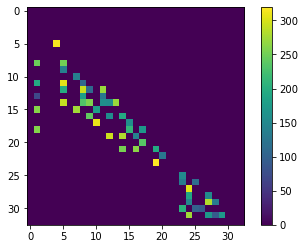

In [7]:
distance_touch_matrix = distance_matrix * proximal_neighbor_matrix

cle.imshow(distance_touch_matrix, colorbar=True)

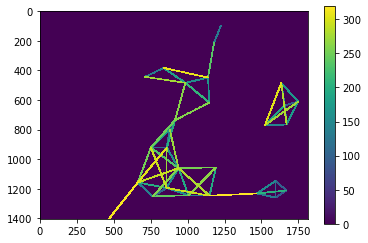

In [8]:
distance_mesh1 = cle.touch_matrix_to_mesh(centroids, distance_touch_matrix)

# we make the lines a bit thicker for visualization purposes
distance_mesh1 = cle.maximum_box(distance_mesh1, radius_x=5, radius_y=5)

cle.imshow(distance_mesh1, colorbar=True)

To check if the nuclei from above are still the centroids of the mesh, we put both together in one image.

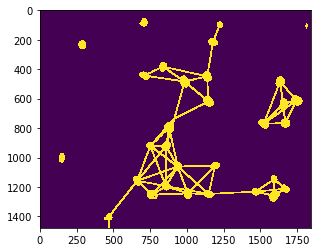

In [9]:
visualization = cle.maximum_images(nuclei > 0, distance_mesh1 > 0)

cle.imshow(visualization)